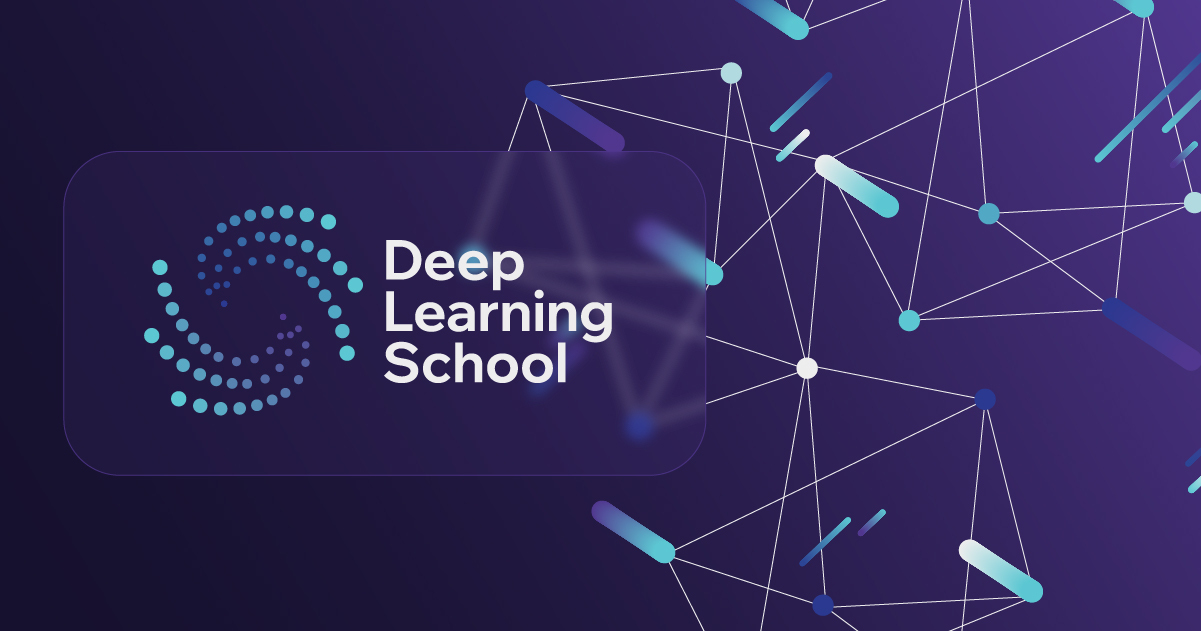

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

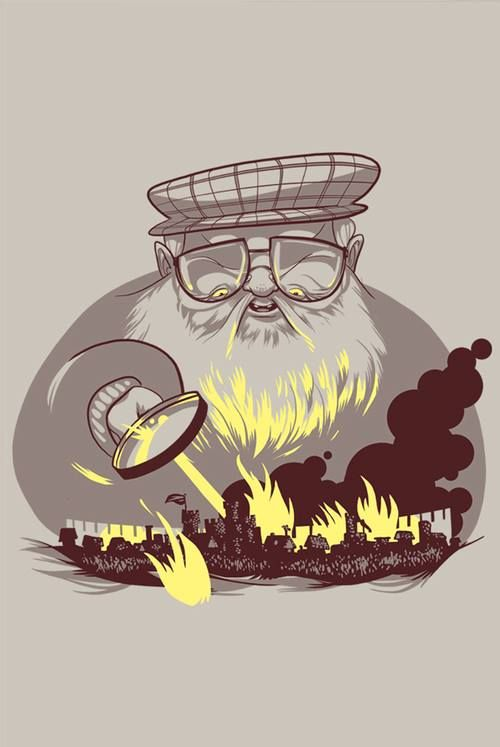

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 50.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 70.7MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [9]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data.shape

(1557, 25)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [8]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [12]:
# Удаление столбцов с большим количеством пропусков
columns_to_drop = [
    "culture", "dateOfBirth", "age",
    "mother", "father", "heir", "spouse",
    "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"
]
data = data.drop(columns=columns_to_drop)

# Заполнение пропусков
data["title"] = data["title"].fillna("No title")
data["house"] = data["house"].fillna("Unknown")

# Проверка оставшихся пропусков
print(data.isna().sum())

name                0
title               0
male                0
house               0
book1               0
book2               0
book3               0
book4               0
book5               0
isMarried           0
isNoble             0
numDeadRelations    0
popularity          0
isAlive             0
dtype: int64


<ipython-input-11-a98ffd563c2b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=culture_survival.index, y=culture_survival.values, palette="viridis")


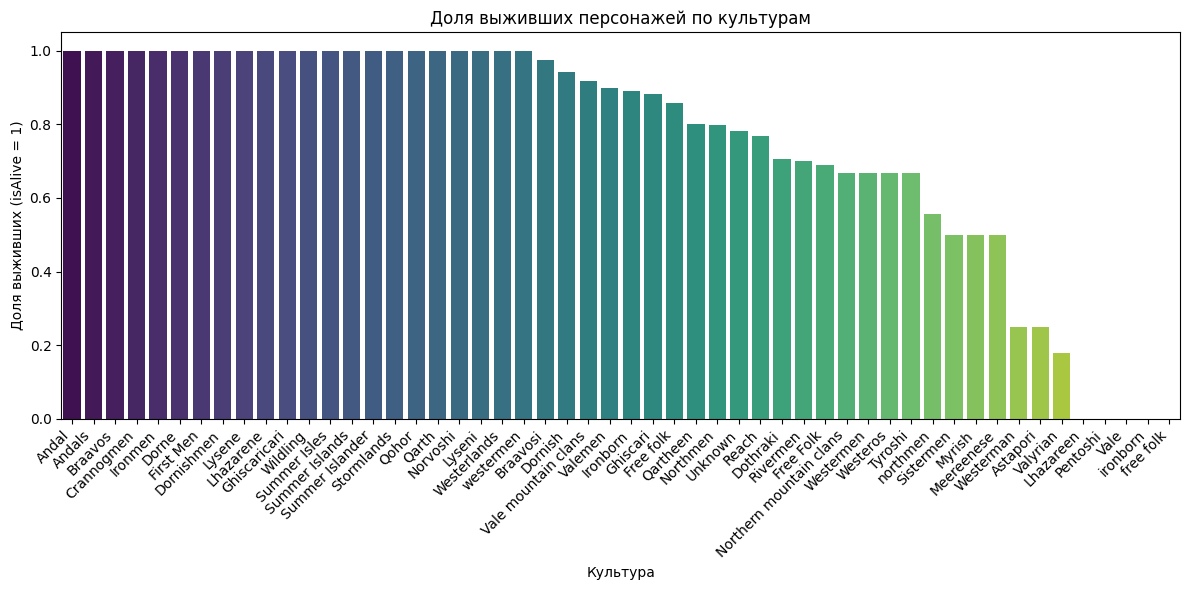

In [11]:
# Замена пропусков в culture (если нужно)
data["culture"] = data["culture"].fillna("Unknown")

# Группировка: средняя выживаемость по культурам
culture_survival = data.groupby("culture")["isAlive"].mean().sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=culture_survival.index, y=culture_survival.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Доля выживших персонажей по культурам")
plt.ylabel("Доля выживших (isAlive = 1)")
plt.xlabel("Культура")
plt.tight_layout()
plt.show()

In [15]:
data.head()

,name,title,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,Viserys II Targaryen,No title,1,Unknown,0,0,0,0,0,0,0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,House Frey,1,1,1,1,1,1,1,1,0.896321,1
3,Addison Hill,Ser,1,House Swyft,0,0,0,1,0,0,1,0,0.267559,1
4,Aemma Arryn,Queen,0,House Arryn,0,0,0,0,0,1,1,0,0.183946,0
5,Sylva Santagar,Greenstone,0,House Santagar,0,0,0,1,0,1,1,0,0.043478,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [17]:
data["isPopular"] = (data["popularity"] >= 0.5).astype(int)  # Преобразуем True/False в 1/0

# 2. Создание boolDeadRelations (есть ли мертвые связи)
data["boolDeadRelations"] = (data["numDeadRelations"] > 0).astype(int)
data.head()

,name,title,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,No title,1,Unknown,0,0,0,0,0,0,0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,House Frey,1,1,1,1,1,1,1,1,0.896321,1,1,1
3,Addison Hill,Ser,1,House Swyft,0,0,0,1,0,0,1,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,House Arryn,0,0,0,0,0,1,1,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,House Santagar,0,0,0,1,0,1,1,0,0.043478,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [25]:
data.drop(columns=['numDeadRelations'], inplace = True)

In [22]:
data.head()

,title,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,No title,1,Unknown,0,0,0,0,0,0,0,11,0,1,1
2,Lord of the Crossing,1,House Frey,1,1,1,1,1,1,1,1,1,1,1
3,Ser,1,House Swyft,0,0,0,1,0,0,1,0,1,0,0
4,Queen,0,House Arryn,0,0,0,0,0,1,1,0,0,0,0
5,Greenstone,0,House Santagar,0,0,0,1,0,1,1,0,1,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [21]:
# Распределение целевой переменной
class_distribution = data["isAlive"].value_counts()

# Доли классов
class_ratio = class_distribution / len(data) * 100

print("Распределение классов:")
print(class_distribution)
print("\nДоли (%):")
print(class_ratio)

Распределение классов:
isAlive
1    1212
0     345
Name: count, dtype: int64

Доли (%):
isAlive
1    77.842004
0    22.157996
Name: count, dtype: float64


In [38]:
data.title.value_counts()

,count
title,
No title,840
Ser,306
Maester,29
Archmaester,21
Lord,19
...,...
Lord of Hellholt,1
Red Flower Vale,1
Lord of Harrenhal,1


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [42]:
# Frequency Encoding для 'title' и 'house'
title_freq = data['title'].value_counts(normalize=True)
house_freq = data['house'].value_counts(normalize=True)

data['title_encoded'] = data['title'].map(title_freq)
data['house_encoded'] = data['house'].map(house_freq)

# Удаляем исходные колонки (по желанию)
data = data.drop(['title', 'house'], axis=1)

KeyError: 'title'

In [41]:
data.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,title_encoded,house_encoded
S.No,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,1,1,0.539499,0.244701
2,1,1,1,1,1,1,1,1,1,1,1,0.000642,0.057161
3,1,0,0,0,1,0,0,1,1,0,0,0.196532,0.004496
4,0,0,0,0,0,0,1,1,0,0,0,0.001927,0.007065
5,0,0,0,0,1,0,1,1,1,0,0,0.000642,0.001285


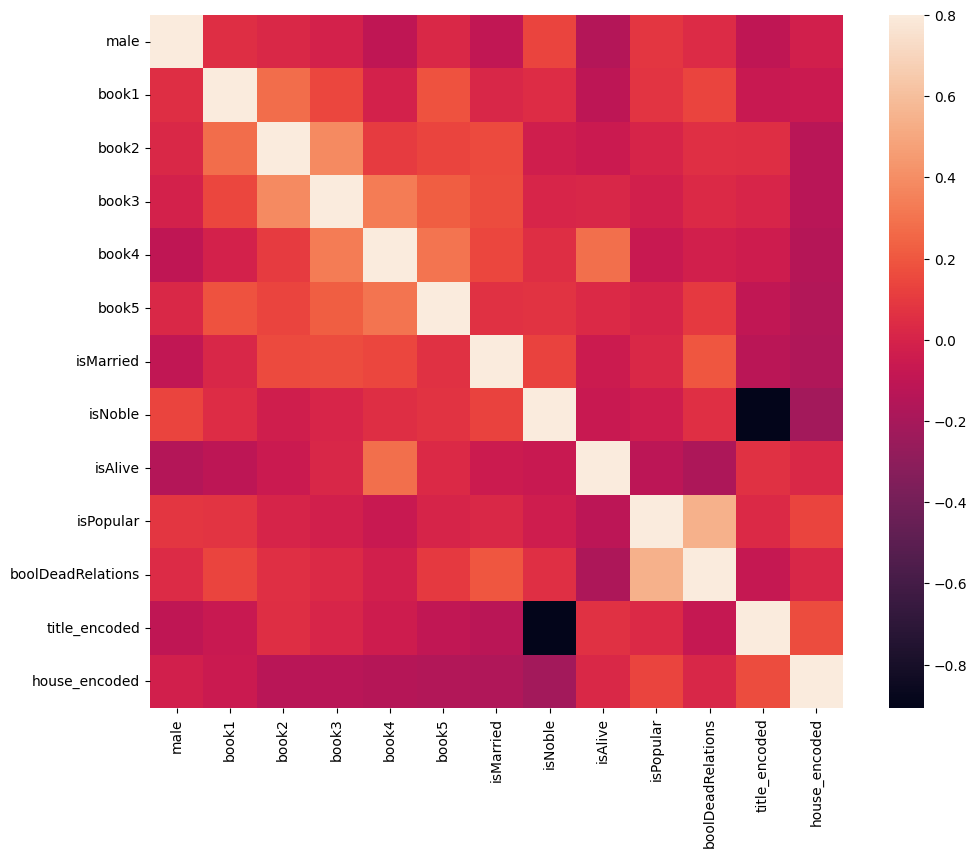

In [43]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

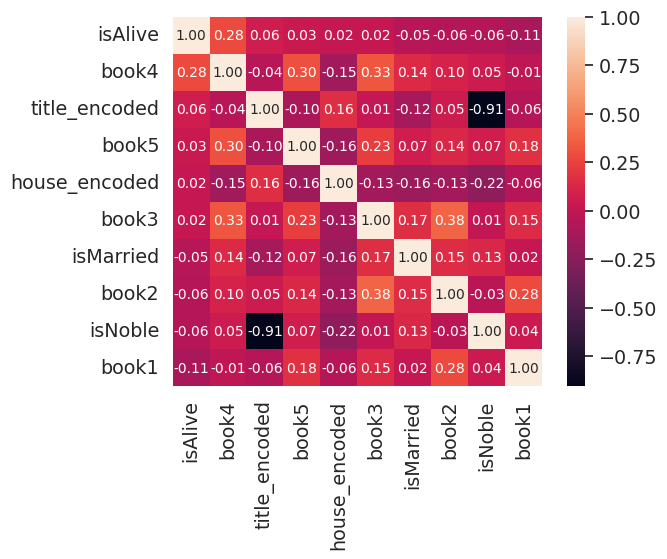

In [45]:
# correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [46]:
data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'isAlive', 'isPopular', 'boolDeadRelations', 'title_encoded',
       'house_encoded'],
      dtype='object')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

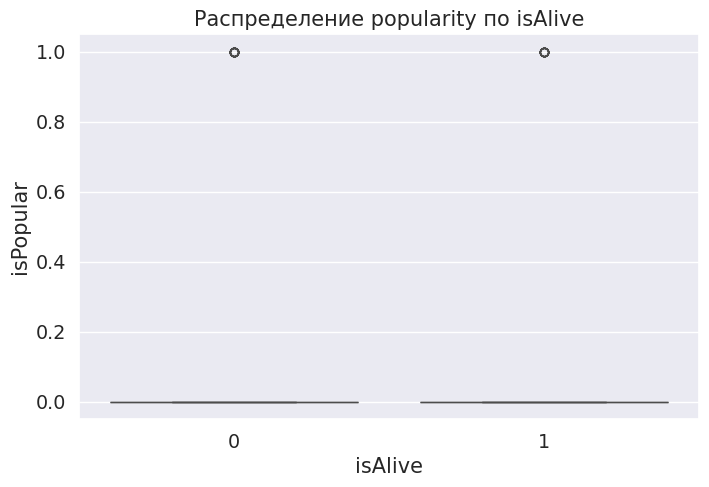

T-test для isPopular: p-value = 0.000


In [49]:
# Boxplot для popularity у живых/мертвых
plt.figure(figsize=(8, 5))
sns.boxplot(x='isAlive', y='isPopular', data=data)
plt.title("Распределение popularity по isAlive")
plt.show()

# T-test для popularity
from scipy.stats import ttest_ind
alive_pop = data[data['isAlive'] == 1]['isPopular']
dead_pop = data[data['isAlive'] == 0]['isPopular']
t_stat, p_value = ttest_ind(alive_pop, dead_pop)
print(f"T-test для isPopular: p-value = {p_value:.3f}")

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [53]:
X = data.drop(columns=['isAlive']).values
y = data.isAlive.values

In [54]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.39499037e-01, 2.44701349e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 6.42260758e-04, 5.71612075e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.96531792e-01, 4.49582531e-03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 5.39499037e-01, 4.49582531e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 5.39499037e-01, 1.28452152e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.39499037e-01, 1.28452152e-03]])

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [58]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [59]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [63]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [65]:
# Создание модели
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Обучение
adaboost.fit(X_train, y_train)

# Предсказание
y_pred_ada = adaboost.predict(X_test)


In [67]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Обучение
random_forest.fit(X_train, y_train)

# Предсказание
y_pred_rf = random_forest.predict(X_test)

In [69]:
from sklearn.gaussian_process.kernels import RBF

# Создание модели (можно настроить ядро)
gpc = GaussianProcessClassifier(kernel=RBF(), random_state=42)

# Обучение
gpc.fit(X_train, y_train)

# Предсказание
y_pred_gp = gpc.predict(X_test)

In [71]:
# Создание модели
gnb = GaussianNB()

# Обучение
gnb.fit(X_train, y_train)

# Предсказание
y_pred_gnb = gnb.predict(X_test)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение
knn.fit(X_train_scaled, y_train)

# Предсказание
y_pred_knn = knn.predict(X_test_scaled)

In [75]:
# Создание модели
svc = SVC(C=1.0, kernel='rbf', random_state=42)

# Обучение
svc.fit(X_train, y_train)

# Предсказание
y_pred_svc = svc.predict(X_test)

In [77]:
# Создание модели
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Обучение
dtree.fit(X_train, y_train)

# Предсказание
y_pred_dt = dtree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [61]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [64]:
# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7917


In [66]:
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7917


In [68]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


In [70]:
accuracy = accuracy_score(y_test, y_pred_gp)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


In [72]:
accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


In [98]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7917


In [76]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


In [78]:
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

In [86]:
test_data = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
test_data.head()

# Удаление столбцов с большим количеством пропусков
columns_to_drop = [
    "culture", "dateOfBirth", "age",
    "mother", "father", "heir", "spouse",
    "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"
]
test_data = test_data.drop(columns=columns_to_drop)

# Заполнение пропусков
test_data["title"] = test_data["title"].fillna("No title")
test_data["house"] = test_data["house"].fillna("Unknown")

# Проверка оставшихся пропусков
print(test_data.isna().sum())

name                0
title               0
male                0
house               0
book1               0
book2               0
book3               0
book4               0
book5               0
isMarried           0
isNoble             0
numDeadRelations    0
popularity          0
dtype: int64


In [87]:
test_data["isPopular"] = (test_data["popularity"] >= 0.5).astype(int)  # Преобразуем True/False в 1/0

# 2. Создание boolDeadRelations (есть ли мертвые связи)
test_data["boolDeadRelations"] = (test_data["numDeadRelations"] > 0).astype(int)
test_data.head()

,name,title,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,Melissa Blackwood,No title,0,House Blackwood,0,0,0,0,1,0,0,0,0.050167,0,0
1559,Melisandre,No title,0,R'hllor,0,1,1,1,1,0,0,0,0.745819,1,0
1560,Merrit,No title,0,Brotherhood without banners,0,0,1,1,0,0,0,0,0.010033,0,0
1561,Meryn Trant,Ser,1,House Trant,1,1,1,1,1,0,1,0,0.220736,0,0
1562,Merrett Frey,No title,1,House Frey,1,1,1,1,1,1,0,0,0.434783,0,0


In [88]:
test_data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)

In [89]:
# Frequency Encoding для 'title' и 'house'
title_freq = test_data['title'].value_counts(normalize=True)
house_freq = test_data['house'].value_counts(normalize=True)

test_data['title_encoded'] = test_data['title'].map(title_freq)
test_data['house_encoded'] = test_data['house'].map(house_freq)

# Удаляем исходные колонки (по желанию)
test_data = test_data.drop(['title', 'house'], axis=1)

In [90]:
test_data.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations,title_encoded,house_encoded
S.No,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,0,0,0.431877,0.005141
1559,0,0,1,1,1,1,0,0,1,0,0.431877,0.005141
1560,0,0,0,1,1,0,0,0,0,0,0.431877,0.017995
1561,1,1,1,1,1,1,0,1,0,0,0.200514,0.002571
1562,1,1,1,1,1,1,1,0,0,0,0.431877,0.020566


In [99]:
X_final = test_data.values
X_final_scaled = scaler.transform(X_final)

In [100]:
y_final_pred = knn.predict(X_final_scaled)


In [101]:
y_final_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [79]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 6.03MB/s]


In [80]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [82]:
submission.shape

(389, 1)

In [102]:
submission["isAlive"] = y_final_pred

In [95]:
submission.head()

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [104]:
submission.to_csv("/content/new_submission_1.csv", index=False)